In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.activations import linear, relu, sigmoid
%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from autils import plt_act_trio
from lab_utils_relu import *
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)


<a name="2"></a>
## 2 - ReLU激活函数
本周，我们介绍了一个新的激活函数，修正线性单元（ReLU）。
$$ a = max(0,z) \quad\quad\text {# ReLU函数} $$

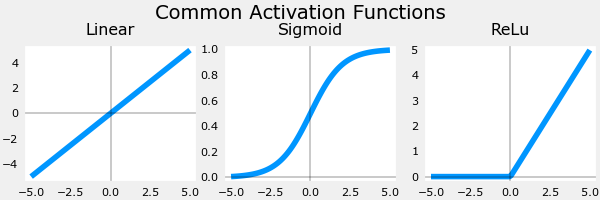

In [2]:
plt_act_trio()

<img align="right" src="./images/C2_W2_ReLu.png"     style=" width:380px; padding: 10px 20px; " >
右边的讲座示例展示了ReLU的应用。在这个例子中，派生的“意识”特征不是二进制的，而是具有连续的值范围。Sigmoid函数最适合开/关或二进制情况。ReLU提供了连续的线性关系。此外，它有一个'关闭'范围，其中输出为零。
"关闭"特性使ReLU成为非线性激活函数。为什么需要这个呢？我们在下面进行检查。

### 为什么需要非线性激活函数？
<img align="left" src="./images/C2_W2_ReLU_Graph.png"     style=" width:250px; padding: 10px 20px; " >所示的函数由线性部分组成（分段线性）。在线性部分，斜率是一致的，然后在转折点处突然改变。在转折点，添加了一个新的线性函数，当与现有函数相加时，将产生新的斜率。新函数在转折点处添加，但在该点之前不会对输出产生贡献。非线性激活函数负责在转折点之前和有时之后禁用输入。下面的练习提供了一个更具体的例子。

这个练习将使用下面的网络来解决一个回归问题，你必须模拟一个分段线性的目标：
<img align="center" src="./images/C2_W2_ReLU_Network.png"     style=" width:650px; padding: 10px 20px; ">  
该网络在第一层有3个单元。每个单元将负责目标的一部分。单元0已经预先编程并固定为映射第一段。你将修改单元1和2中的权重和偏差来模拟第二和第三段。输出单元也是固定的，只是简单地将第一层的输出相加。

使用下面的滑块，修改权重和偏差以匹配目标。
提示：从`w1`和`b1`开始，将`w2`和`b2`保持为零，直到你匹配到第二段。点击比滑动更快。如果你遇到困难，不用担心，下面的文本将更详细地描述这个问题。

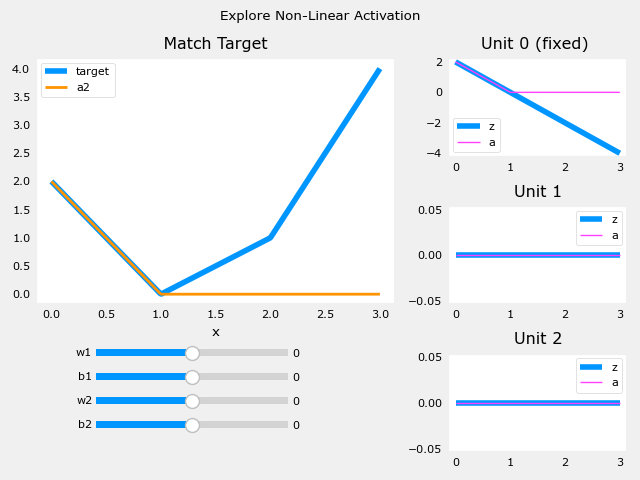

In [3]:
_ = plt_relu_ex()

 
这个练习的目标是理解ReLU的非线性行为如何提供所需的能力，即在需要时关闭函数。让我们看看这个例子中是如何工作的。
<img align="right" src="./images/C2_W2_ReLU_Plot.png"     style=" width:600px; padding: 10px 20px; "> 
右边的图表包含了第一层单元的输出。
从顶部开始，单元0负责标记为1的第一段。线性函数$z$和ReLU后的函数$a$都显示出来。你可以看到ReLU在区间[0,1]后切断了函数。这是关键，因为它防止了与后续段干扰。

单元1负责第二段。在这里，ReLU保持这个单元在x大于1之后才开始工作。由于第一个单元没有贡献，所以单元1的斜率$w^{[1]}_1$就是目标线的斜率。偏差必须调整，以保持输出在x达到1之前为负。

单元2负责第三段。ReLU再次将输出归零，直到x达到正确的值。单元的斜率$w^{[1]}_2$必须设置为使得单元1和2的和具有所需的斜率。偏差再次调整，以保持输出在x达到2之前为负。

ReLU激活函数的"关闭"或禁用特性使模型能够将线性段拼接在一起，以模拟复杂的非线性函数。


# =======End of new Material===

## New Activation
本周，我们介绍了一个新的激活函数，修正线性单元（ReLU）。 

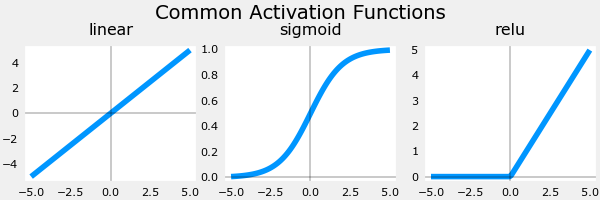

In [4]:
def plt_act_trio():
    X = np.linspace(-5,5,100)
    fig,ax = plt.subplots(1,3, figsize=(6,2))
    widgvis(fig)
    ax[0].plot(X,tf.keras.activations.linear(X))
    ax[0].axvline(0, lw=0.3, c="black")
    ax[0].axhline(0, lw=0.3, c="black")
    ax[0].set_title("linear")
    ax[1].plot(X,tf.keras.activations.sigmoid(X))
    ax[1].axvline(0, lw=0.3, c="black")
    ax[1].axhline(0, lw=0.3, c="black")
    ax[1].set_title("sigmoid")
    ax[2].plot(X,tf.keras.activations.relu(X))
    ax[2].axhline(0, lw=0.3, c="black")
    ax[2].axvline(0, lw=0.3, c="black")
    ax[2].set_title("relu")
    fig.suptitle("Common Activation Functions", fontsize=14)
    fig.tight_layout(pad=0.2)
    plt.show()
plt_act_trio()

<right images>
右边的例子展示了ReLU的应用。在这个例子中，“意识”特征不是二进制的，而是有一个从0到更大值的范围。Sigmoid函数最适合开/关或二进制情况。ReLU提供了一个线性关系，并且有一个'关闭'范围，其中输出为零。"关闭"特性使ReLU成为非线性激活函数。为什么需要这个呢？让我们通过下面的例子来检查。

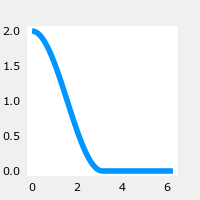

In [5]:
X = np.linspace(0,2*np.pi, 100)
y = np.cos(X)+1
y[50:100]=0
fig,ax = plt.subplots(1,1, figsize=(2,2))
widgvis(fig)
ax.plot(X,y)
plt.show()

In [6]:
w10 = np.array([[-1]])
b10 = np.array([2.6])
d10 = Dense(1, activation = "linear", input_shape = (1,), weights=[w10,b10])
z10 = d10(X.reshape(-1,1))
a10 = relu(z10)

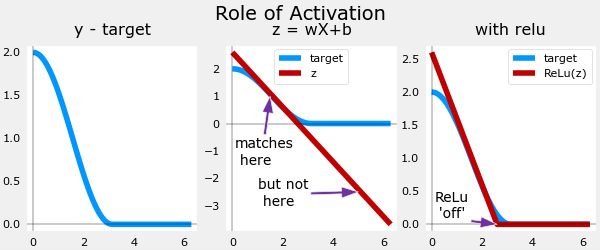

In [7]:
def plt_act1(y,z,a):
    fig,ax = plt.subplots(1,3, figsize=(6,2.5))
    widgvis(fig)
    ax[0].plot(X,y,label="target")
    ax[0].axvline(0, lw=0.3, c="black")
    ax[0].axhline(0, lw=0.3, c="black")
    ax[0].set_title("y - target")
    ax[1].plot(X,y, label="target")
    ax[1].plot(X,z, c=dlc["dldarkred"],label="z")
    ax[1].axvline(0, lw=0.3, c="black")
    ax[1].axhline(0, lw=0.3, c="black")
    ax[1].set_title("z = wX+b")
    ax[1].legend(loc="upper center")
    ax[2].plot(X,y, label="target")
    ax[2].plot(X,a, c=dlc["dldarkred"],label="ReLu(z)")
    ax[2].axhline(0, lw=0.3, c="black")
    ax[2].axvline(0, lw=0.3, c="black")
    ax[2].set_title("with relu")
    ax[2].legend()
    fig.suptitle("Role of Activation", fontsize=14)
    fig.tight_layout(pad=0.2)
    return(ax)


def plt_add_notation(ax):
    ax[1].annotate(text = "matches\n here", xy =(1.5,1.0), 
                   xytext = (0.1,-1.5), fontsize=10,
                  arrowprops=dict(facecolor=dlc["dlpurple"],width=2, headwidth=8))
    ax[1].annotate(text = "but not\n here", xy =(5,-2.5), 
                   xytext = (1,-3), fontsize=10,
                  arrowprops=dict(facecolor=dlc["dlpurple"],width=2, headwidth=8))
    ax[2].annotate(text = "ReLu\n 'off'", xy =(2.6,0), 
                   xytext = (0.1,0.1), fontsize=10,
                  arrowprops=dict(facecolor=dlc["dlpurple"],width=2, headwidth=8))
    
ax = plt_act1(y,z10,a10)
plt_add_notation(ax)

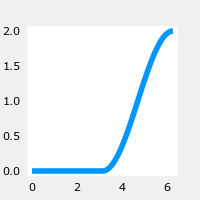

In [8]:
X = np.linspace(0,2*np.pi, 100)
y = np.cos(X)+1
y[0:49]=0
fig,ax = plt.subplots(1,1, figsize=(2,2))
widgvis(fig)
ax.plot(X,y)
plt.show()

array([<AxesSubplot:title={'center':'y - target'}>,
       <AxesSubplot:title={'center':'z = wX+b'}>,
       <AxesSubplot:title={'center':'with relu'}>], dtype=object)

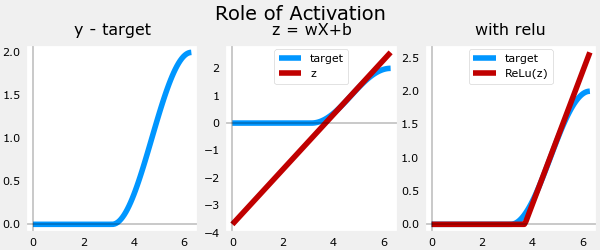

In [9]:
w11 = np.array([[1]])
b11 = np.array([-3.7])
d11 = Dense(1, activation = "linear", input_shape = (1,), weights=[w11,b11])
z11 = d11(X.reshape(-1,1))
a11 = relu(z11)
plt_act1(y,z11,a11)

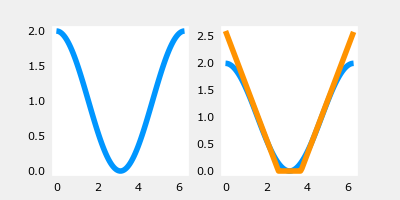

In [10]:
X = np.linspace(0,2*np.pi, 100)
y = np.cos(X)+1
X=X.reshape(-1,1)
yhat = relu(d10(X)) + relu(d11(X))

fig,ax = plt.subplots(1,2, figsize=(4,2))
widgvis(fig)
ax[0].plot(X,y)
ax[1].plot(X,y)
ax[1].plot(X,yhat)
plt.show()

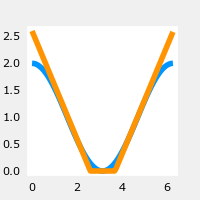

In [11]:
X=X.reshape(-1,1)
yhat = relu(d10(X)) + relu(d11(X))
fig,ax = plt.subplots(1,1, figsize=(2,2))
widgvis(fig)
ax.plot(X,y)
ax.plot(X,yhat)
plt.show()

In [12]:
yhat = model.predict(X.reshape(-1,1))
fig,ax = plt.subplots(1,1, figsize=(2,2))
widgvis(fig)
ax.plot(X,y)
ax.plot(X,yhat)
plt.show()

NameError: name 'model' is not defined

In [ ]:
from keras import activations

model = Sequential(
    [ 
        d10,
        tf.layers.Activation(activations.relu),
        d11,
        tf.layers.Activation(activations.relu),
        Dense(1, activation = 'linear')
    ]
)
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.1),
)

model.fit(
    X,y,
    epochs=1000
)

In [ ]:
model = Sequential(
    [ 
        Dense(1,activation="relu", name = 'l1'),
        Dense(1,activation="linear", name = 'l2')
    ]
)
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    X,y,
    epochs=10
)

In [ ]:
yhat = model.predict(X)
yhat[0:5]

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(4,4))
ax.plot(X,y)
ax.plot(X,yhat, c=dlc["dldarkred"])
plt.show()

In [ ]:
l1 = model.get_layer('l1')
l2 = model.get_layer('l2')

In [ ]:
l1.get_weights()

In [ ]:
l2.get_weights()

In [ ]:
l1 = model.get_layer('l1')
l2 = model.get_layer('l2')
l1.get_weights()
l2.get_weights()

w1 = np.array([[-1]])
b1 = np.array([1])
l1.set_weights([w1,b1])

w2 = np.array([[1]])
b2 = np.array([0])
l2.set_weights([w2,b2])
model.fit(
    X,y,
    epochs=100
)

In [ ]:
l2.set_weights([w2,b2])

In [ ]:
yhat = model.predict(X)
fig,ax = plt.subplots(1,1, figsize=(4,4))
ax.plot(X,y)
ax.plot(X,yhat, c=dlc["dldarkred"])
plt.show()

## 2-D

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import warnings
from matplotlib import cm
from matplotlib.patches import FancyArrowPatch
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as colors
from lab_utils_common import dlc
dkcolors = plt.cm.Paired((1,3,7,9,5,11))
ltcolors = plt.cm.Paired((0,2,6,8,4,10))
dkcolors_map = mpl.colors.ListedColormap(dkcolors)
ltcolors_map = mpl.colors.ListedColormap(ltcolors)



In [ ]:
def plt_mc_data(ax, X, y, classes,  class_labels=None, map=plt.cm.Paired, 
                legend=False, size=50, m='o', equal_xy = False):
    """ Plot multiclass data. Note, if equal_xy is True, setting ylim on the plot may not work """
    for i in range(classes):
        idx = np.where(y == i)
        col = len(idx[0])*[i]
        label = class_labels[i] if class_labels else "c{}".format(i)
        ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
                    c=col, vmin=0, vmax=map.N, cmap=map,
                    s=size, label=label)
    if legend: ax.legend()
    if equal_xy: ax.axis("equal")

def plt_mc(X_train,y_train,classes):
    css = np.unique(y_train)
    fig,ax = plt.subplots(1,1,figsize=(3,3))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    plt_mc_data(ax, X_train,y_train,classes, map=dkcolors_map, legend=True, size=10, equal_xy = False)
    ax.set_title("Multiclass Data")
    ax.set_xlabel("x0")
    ax.set_ylabel("x1")
    return(ax)
    
def plot_cat_decision_boundary_mc(ax, X, predict , class_labels=None, legend=False, vector=True):

    # create a mesh to points to plot
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    h = max(x_max-x_min, y_max-y_min)/200
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    points = np.c_[xx.ravel(), yy.ravel()]
    #print("points", points.shape)
    #print("xx.shape", xx.shape)

    #make predictions for each point in mesh
    if vector:
        Z = predict(points)
    else:
        Z = np.zeros((len(points),))
        for i in range(len(points)):
            Z[i] = predict(points[i].reshape(1,2))
    Z = Z.reshape(xx.shape)

    #contour plot highlights boundaries between values - classes in this case
    ax.contour(xx, yy, Z, linewidths=1) 
    #ax.axis('tight')


In [ ]:
X = np.random.rand(300, 2)
y = np.sqrt( X[:,0]**2 + X[:,1]**2 ) < 0.6
#y = np.logical_and( X[:,0] < 0.5, X[:,1] < 0.5 ).astype(int)
y.shape
plt_mc(X,y,2,)

In [ ]:
model = Sequential(
    [ 
        Dense(2,activation="relu",    name = 'l1'),
        Dense(1,activation="sigmoid", name = 'l2')
    ]
)

model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    X,y,
    epochs=150
)

In [ ]:
ax = plt_mc(X,y,2,)
predict = lambda  x: (model.predict(x) > 0.5).astype(int)
plot_cat_decision_boundary_mc(ax, X, predict, legend = True, vector=True)

In [ ]:
l1 = model.get_layer("l1")
W1,b1 = l1.get_weights()
l2 = model.get_layer("l2")
W2,b2 = l2.get_weights()
print(W1,b1)
print(W2,b2)

In [ ]:
x0 = np.array([0.4,0.60])
np.dot( np.dot(x0,W1) + b1, W2) + b2

In [ ]:
## Example

In [ ]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]

datasets = [
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params["n_clusters"])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"], preference=params["preference"], random_state=0
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        affinity="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"], covariance_type="full"
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            print(X.shape,algorithm)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()